# Aula 06 - Agrupamento Avançado de Dados

## **Resumo**: Exerícios de agrupamento avançado de DataFrames do Pandas.

# I CARREGAMENTO DOS PACOTES NECESSÁRIOS

In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm import tqdm

# II DIRETÓRIOS

In [5]:
os.chdir("G:\\Meu Drive\\Selection\\esm_selection")
root_dir   = Path(os.getcwd())
input_dir  = Path(root_dir, "Data/Input")
output_dir = Path(root_dir, "Data/Output")
figure_dir = Path(root_dir, 'Figures/')
output_dir

WindowsPath('G:/Meu Drive/Selection/esm_selection/Data/Output')

# Exercício 1: Agrupamento Avançado de Dados

In [120]:
# a)
pagamentos = (pd.read_pickle(Path(input_dir, "pagamentos_missings.pickle") )
              .T.drop_duplicates().T
              .dropna(how = 'all', axis = 1)
              .dropna(how = 'all', axis = 0)
              .assign(salario = lambda df: np.random.triangular(1320, 2500, 49000, size = df.shape[0]),
                      encargos = lambda df: 0.15*df["salario"] + np.random.triangular(100, 500, 2000, size = df.shape[0])
                                 +  np.random.triangular(10, 50, 100, size = df.shape[0])**2,
                      custo_mensal = lambda df: df["encargos"] + df["salario"],
                      custo_anual = lambda df: df["custo_mensal"]*12
                      )
              )

pagamentos.head()

,cpf,salario,encargos,custo_mensal,salario_anual,custo_anual
0,908777362057,10110.102257,3014.119846,13124.222102,273262.5625,157490.665229
1,324268288911,33328.350654,8542.233990,41870.584645,247650.71875,502447.015737
2,766148980149,16589.712878,10020.283170,26609.996048,330328.0625,319319.952571
3,575223597306,19887.921311,7015.939142,26903.860453,349767.625,322846.325431
4,900619489281,10338.929862,5824.838578,16163.768440,451407.625,193965.221276


In [121]:
# b)
intervals = np.linspace(pagamentos["salario"].min(),
                        pagamentos["salario"].max(),
                        6
                  )
intervals

array([ 1497.82331014, 10928.69421901, 20359.56512788, 29790.43603675,
       39221.30694562, 48652.17785449])

In [122]:
# c)
pagamentos = (pagamentos
              .assign(wage_cat      = lambda df: pd.cut(df["salario"], bins = intervals,
                                                        labels =  ["VL", "L", "R", "H", "VH" ]),
                      fiscal_region = lambda df: df["cpf"].str.slice(8,9),

                      )
              )
pagamentos

,cpf,salario,encargos,custo_mensal,salario_anual,custo_anual,wage_cat,fiscal_region
0,908777362057,10110.102257,3014.119846,13124.222102,273262.5625,157490.665229,VL,2
1,324268288911,33328.350654,8542.233990,41870.584645,247650.71875,502447.015737,H,8
2,766148980149,16589.712878,10020.283170,26609.996048,330328.0625,319319.952571,L,0
3,575223597306,19887.921311,7015.939142,26903.860453,349767.625,322846.325431,L,7
4,900619489281,10338.929862,5824.838578,16163.768440,451407.625,193965.221276,VL,9
...,...,...,...,...,...,...,...,...
7958,987599552888,22004.142180,11205.850714,33209.992894,113400.71875,398519.914731,R,2
7959,577833528199,2591.704983,2038.612667,4630.317650,305986.3125,55563.811803,VL,8
7960,920324446993,36799.090843,9659.864019,46458.954862,169613.03125,557507.458341,H,6
7961,631234133516,8455.067489,9130.444973,17585.512462,330229.6875,211026.149540,VL,3


In [123]:
# d)
pagamentos_aggregated = (pagamentos
                         .groupby(['wage_cat'])
                         [['salario', 'encargos']]
                         .aggregate(["sum", "mean", "median", "std",
                                     ("q_25", lambda x: np.quantile(x, q = 0.25) ),
                                     ("q_75", lambda x: np.quantile(x, q = 0.75) )])
                         )
pagamentos_aggregated

salario                                                         \
                   sum          mean        median          std          q_25   
wage_cat                                                                        
VL        1.734444e+07   6350.946966   6350.246134  2607.153214   4124.450230   
L         3.581786e+07  15392.289833  15228.533855  2750.777759  13003.557404   
R         3.843553e+07  24749.214170  24475.789431  2732.089494  22320.503823   
H         3.528141e+07  33957.081490  33834.422509  2668.070949  31627.896337   
VH        1.324935e+07  42465.879607  42145.236898  2288.044844  40501.600346   

                            encargos                                           \
                  q_75           sum          mean        median          std   
wage_cat                                                                        
VL         8596.549007  1.364797e+07   4997.427394   4631.207186  2125.993380   
L         17753.148974  1.490326e+07   6404.495089   6038.977175  2174.460381   
R         26972.000425  1.207820e+07   7777.331250   7378.376338  2111.492773   
H         36090.461246  9.665954e+06   9303.131776   8950.604088  2167.902132   
VH        44165.907620  3.256912e+06  10438.820388  10134.050572  2062.662142   

                                     
                 q_25          q_75  
wage_cat                             
VL        3388.779004   6331.880347  
L         4765.990262   7751.852176  
R         6184.886108   9074.053709  
H         7650.541857  10729.835127  
VH        8971.994870  11607.565451

In [124]:
# e)
pagamentos_transformed = (pagamentos
                          .assign(wage_g_mean   = lambda df: df.groupby(['wage_cat'])["salario"].transform("mean"),
                                  wage_diff     = lambda df: df["salario"] - df["wage_g_mean"],
                                  wage_g_std    = lambda df: df.groupby(['wage_cat'])["salario"].transform("std")
                                  )
                         )
pagamentos_transformed

,cpf,salario,encargos,custo_mensal,salario_anual,custo_anual,wage_cat,fiscal_region,wage_g_mean,wage_diff,wage_g_std
0,908777362057,10110.102257,3014.119846,13124.222102,273262.5625,157490.665229,VL,2,6350.946966,3759.155290,2607.153214
1,324268288911,33328.350654,8542.233990,41870.584645,247650.71875,502447.015737,H,8,33957.081490,-628.730835,2668.070949
2,766148980149,16589.712878,10020.283170,26609.996048,330328.0625,319319.952571,L,0,15392.289833,1197.423045,2750.777759
3,575223597306,19887.921311,7015.939142,26903.860453,349767.625,322846.325431,L,7,15392.289833,4495.631478,2750.777759
4,900619489281,10338.929862,5824.838578,16163.768440,451407.625,193965.221276,VL,9,6350.946966,3987.982895,2607.153214
...,...,...,...,...,...,...,...,...,...,...,...
7958,987599552888,22004.142180,11205.850714,33209.992894,113400.71875,398519.914731,R,2,24749.214170,-2745.071990,2732.089494
7959,577833528199,2591.704983,2038.612667,4630.317650,305986.3125,55563.811803,VL,8,6350.946966,-3759.241983,2607.153214
7960,920324446993,36799.090843,9659.864019,46458.954862,169613.03125,557507.458341,H,6,33957.081490,2842.009353,2668.070949
7961,631234133516,8455.067489,9130.444973,17585.512462,330229.6875,211026.149540,VL,3,6350.946966,2104.120522,2607.153214


# Exercíco 2: Gráficos

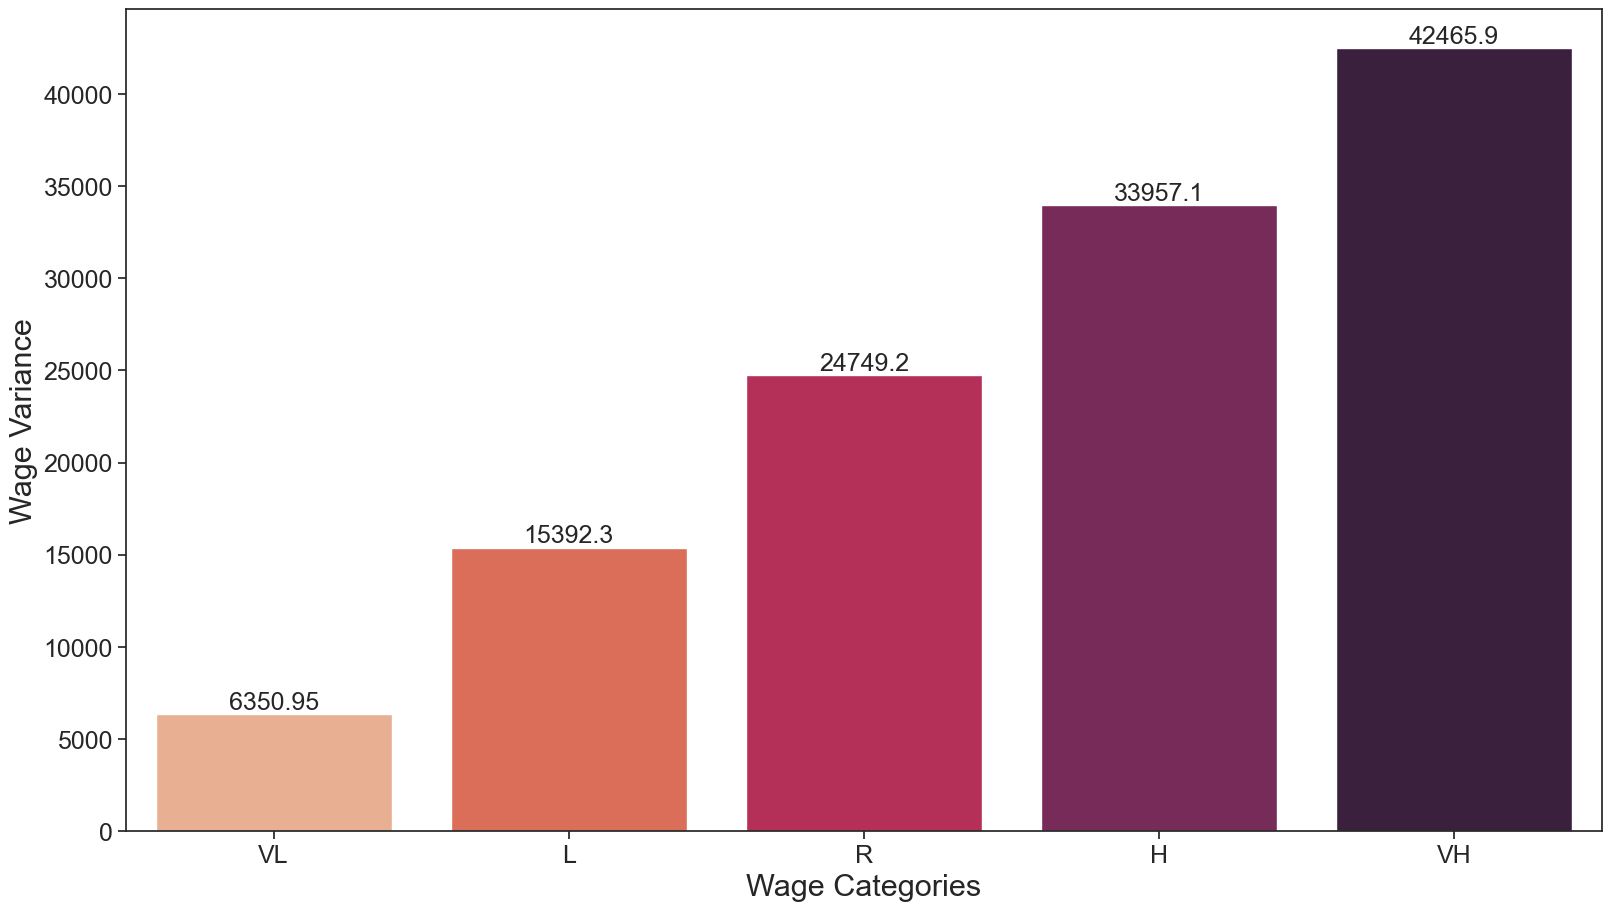

In [125]:
# a)
plt.figure(figsize = (16, 9), layout = 'constrained')
sns.set(style = "ticks")
bar_plot = sns.barplot(data = pagamentos_transformed, x = "wage_cat", y = "wage_g_mean",  errwidth = 0, palette = "rocket_r")
bar_plot.bar_label(bar_plot.containers[-1], label_type = 'edge', fontsize = 18)

plt.xlabel("Wage Categories", fontsize = 22)
plt.ylabel("Wage Variance", fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
bar_plot.get_figure().savefig( Path(figure_dir, 'Bar_Plot' + '.png'), dpi = 400)

plt.show()

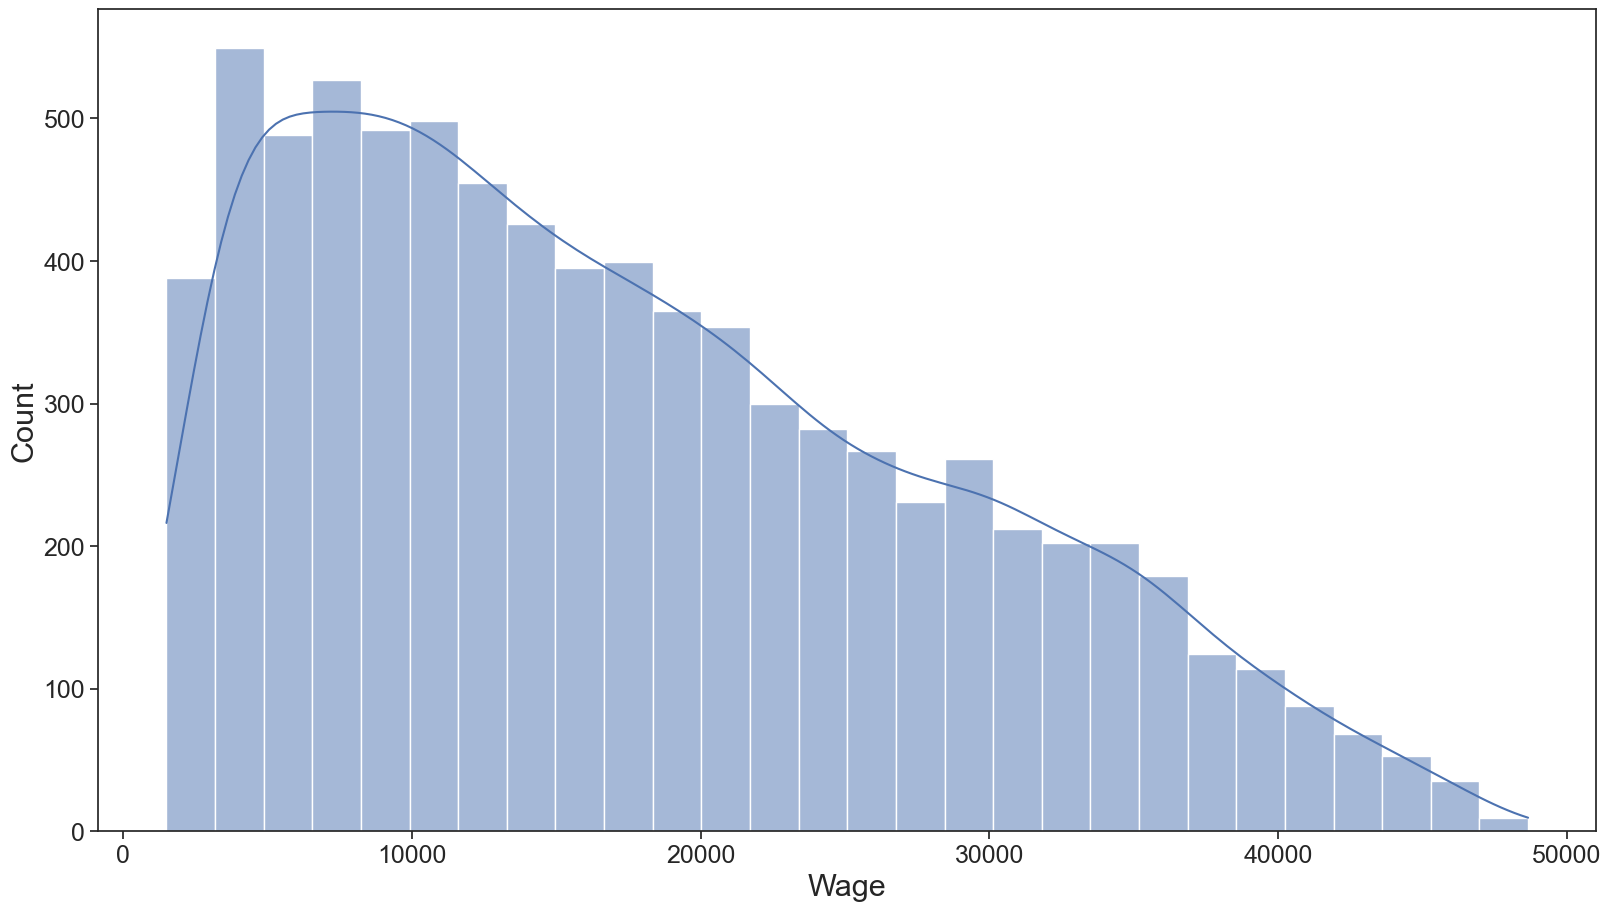

In [126]:
# b)

plt.figure(figsize = (16, 9), layout = 'constrained')
sns.set(style = "ticks")
hist_plot = sns.histplot(data = pagamentos_transformed, x = "salario", kde = True)
plt.xlabel("Wage", fontsize = 22)
plt.ylabel("Count", fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
hist_plot.get_figure().savefig( Path(figure_dir, 'Histogram' + '.png'), dpi = 400)


plt.show()

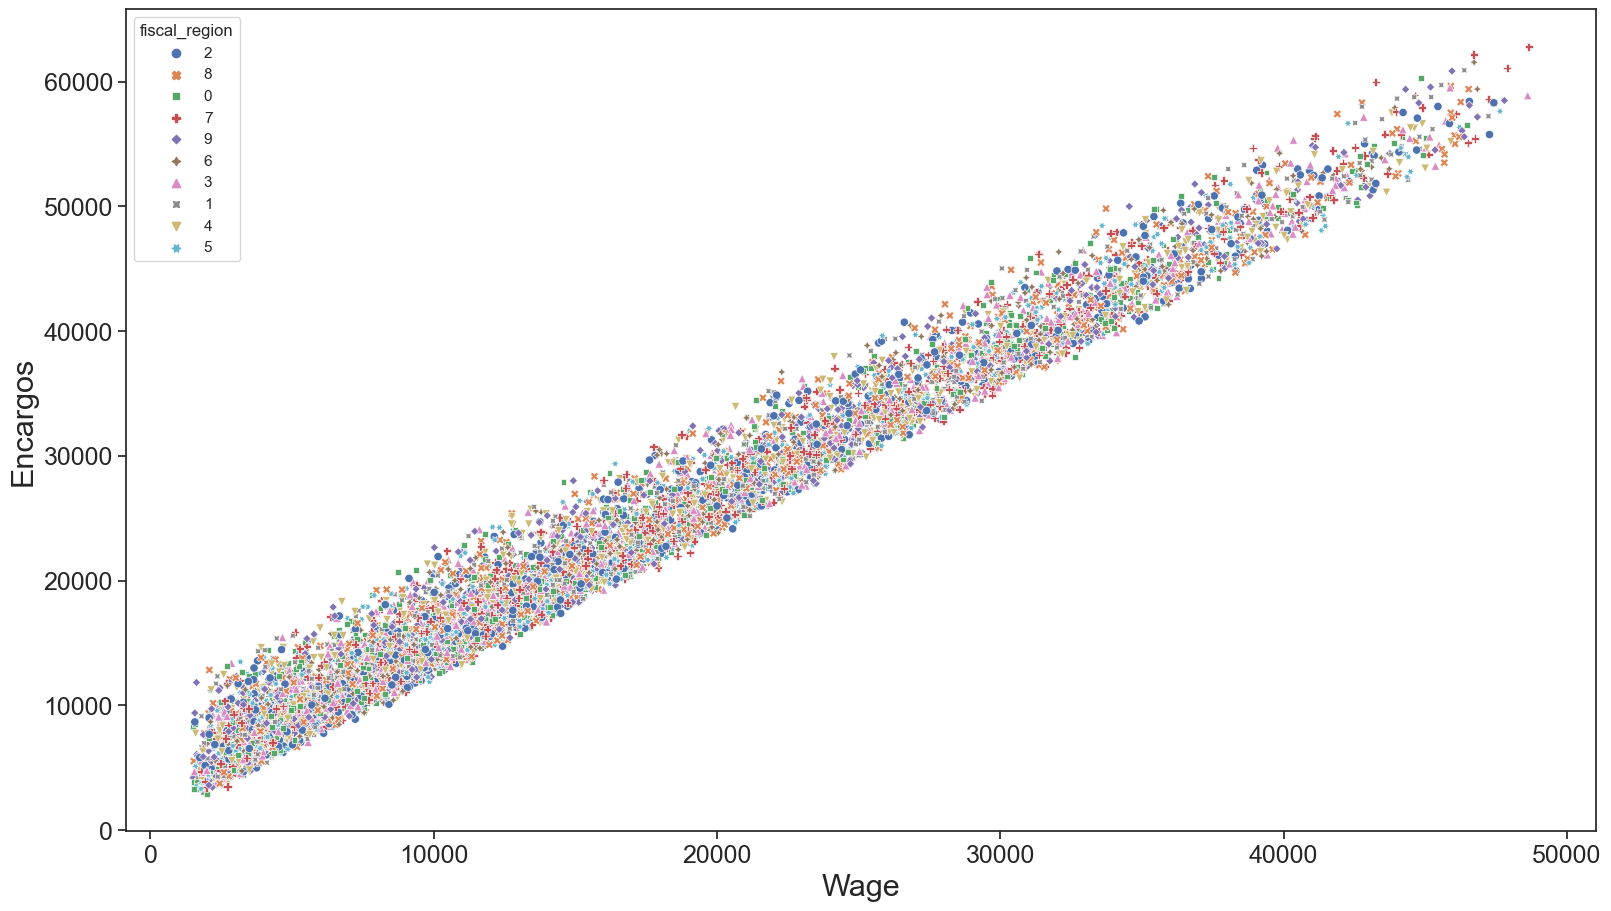

In [127]:
# c)
plt.figure(figsize = (16, 9), layout = 'constrained')
sns.set(style = "ticks")
sc_plot = sns.scatterplot(data = pagamentos_transformed, x = "salario", y = "custo_mensal",
                          hue = "fiscal_region", style = "fiscal_region")
plt.xlabel("Wage", fontsize = 22)
plt.ylabel("Encargos", fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
sc_plot.get_figure().savefig( Path(figure_dir, 'Scatter' + '.png'), dpi = 400)


plt.show()

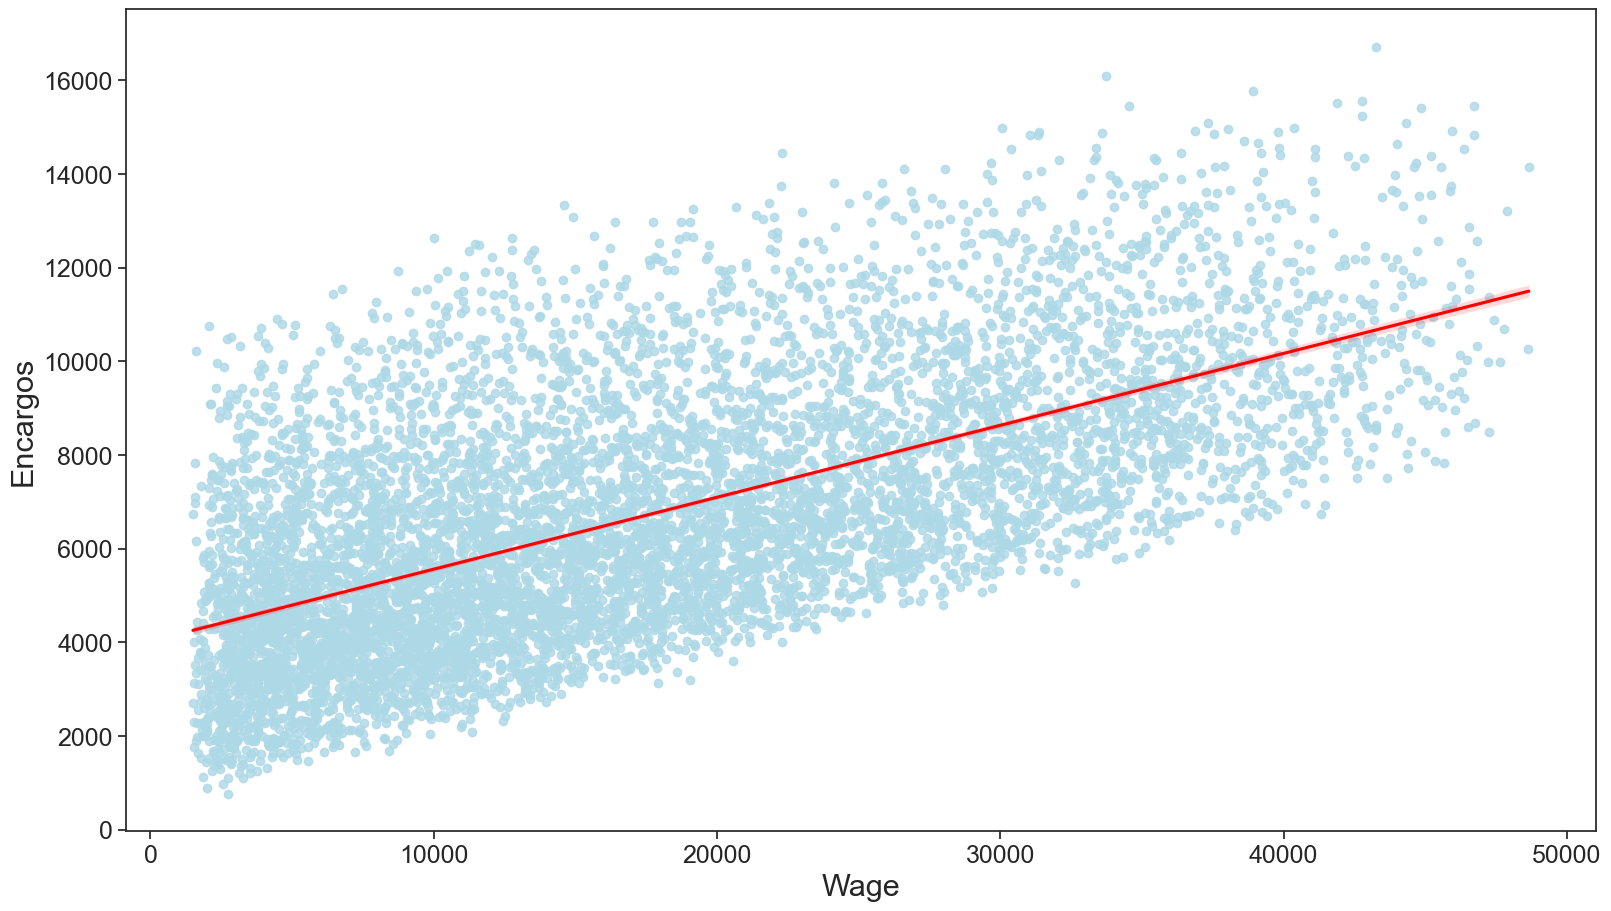

In [133]:
# d)
plt.figure(figsize = (16, 9), layout = 'constrained')
sns.set(style = "ticks")
lm_plot = sns.regplot(data = pagamentos_transformed, x = "salario", y = "encargos",
                      scatter_kws={"color": "lightblue"}, line_kws={"color": "red"}
                         )
plt.xlabel("Wage", fontsize = 22)
plt.ylabel("Encargos", fontsize = 22)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
lm_plot.get_figure().savefig( Path(figure_dir, 'Linear Model' + '.png'), dpi = 400)


plt.show()

100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


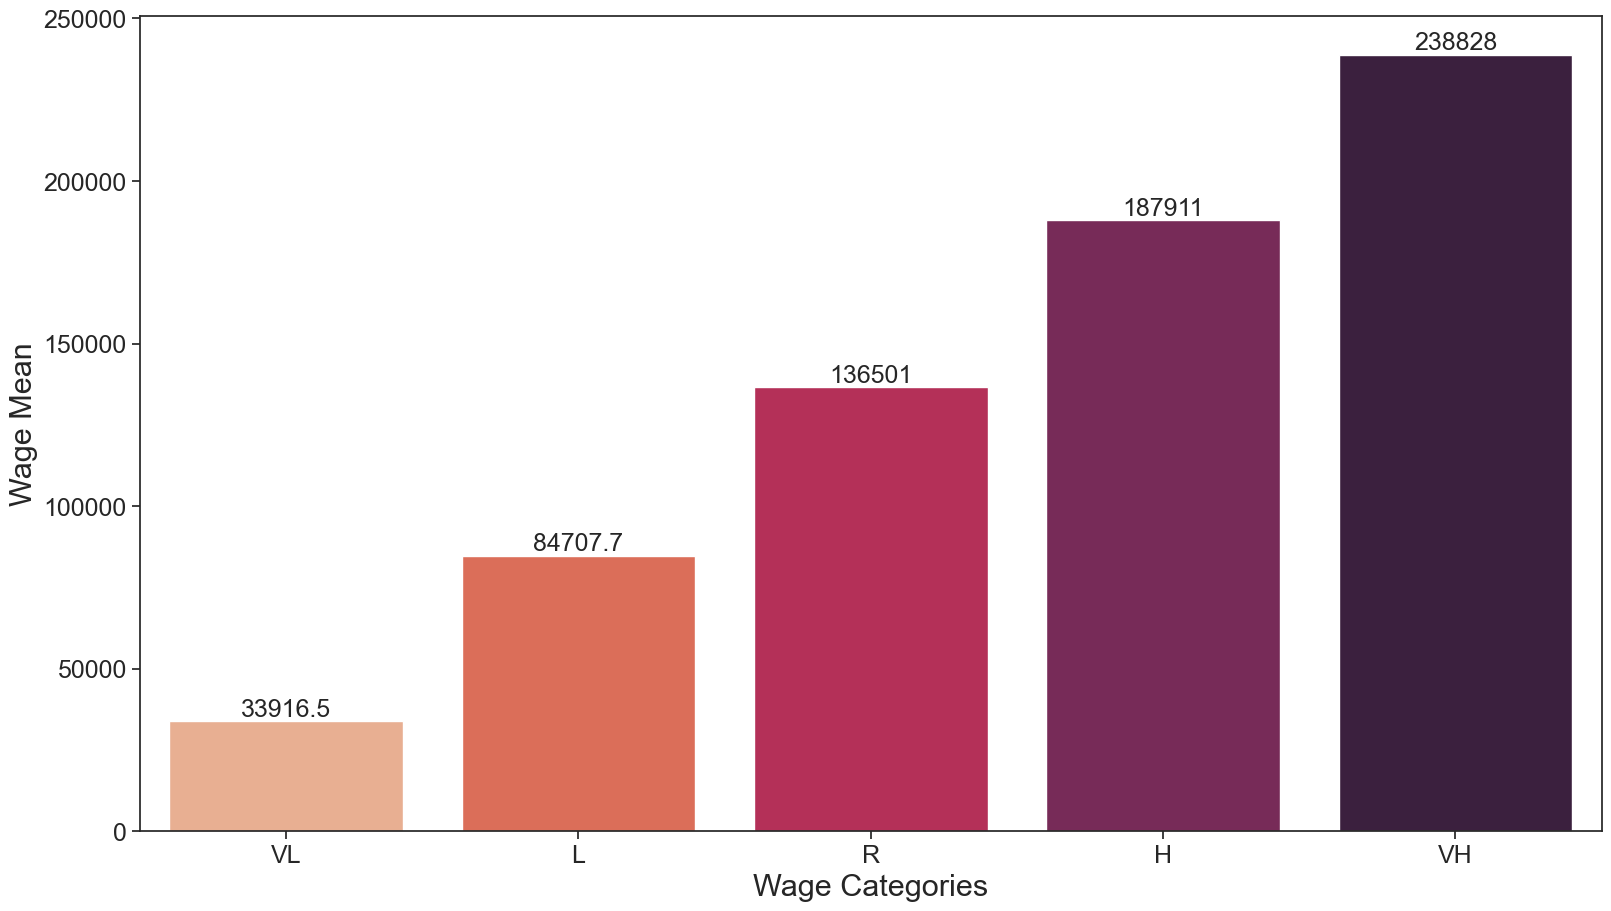

In [44]:
# e)
regions = (pagamentos_transformed["fiscal_region"]
           .unique()
           .tolist()
           )

for region in tqdm(regions):
    plt.close()
    foo = (pagamentos_transformed
           .loc[lambda x: x['fiscal_region'] == region]
           .assign(wage_g_mean = lambda df: df["wage_g_mean"] * (1+ int(region) ) )
           )
    plt.figure(figsize = (16, 9), layout = 'constrained')
    sns.set(style = "ticks")
    bar_plot = sns.barplot(data = foo, x = "wage_cat", y = "wage_g_mean",  errwidth = 0, palette = "rocket_r")
    bar_plot.bar_label(bar_plot.containers[-1], label_type = 'edge', fontsize = 18)
    plt.xlabel("Wage Categories", fontsize = 22)
    plt.ylabel("Wage Mean", fontsize = 22)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
    bar_plot.get_figure().savefig( Path(figure_dir, 'Bar_Plot_' + region + '.png'), dpi = 400)